In [1]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import calendar

In [2]:
with open('logins.json') as json_data:
    logins_json = json.load(json_data)
    logins = pd.DataFrame(logins_json)
    logins.login_time = pd.to_datetime(logins.login_time)
    
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [4]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


## Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them

In [5]:
logins = logins.set_index('login_time')
logins['login'] = 1
#logins_15min = logins.groupby(pd.Grouper(freq='15Min')).agg('count')

In [6]:
logins_15min = logins.resample('15Min', how='sum')
logins_15min.head()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


,login
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [7]:
logins.head()

,login
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [8]:
logins.tail()

,login
login_time,
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1
1970-04-13 18:57:38,1
1970-04-13 18:54:23,1


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


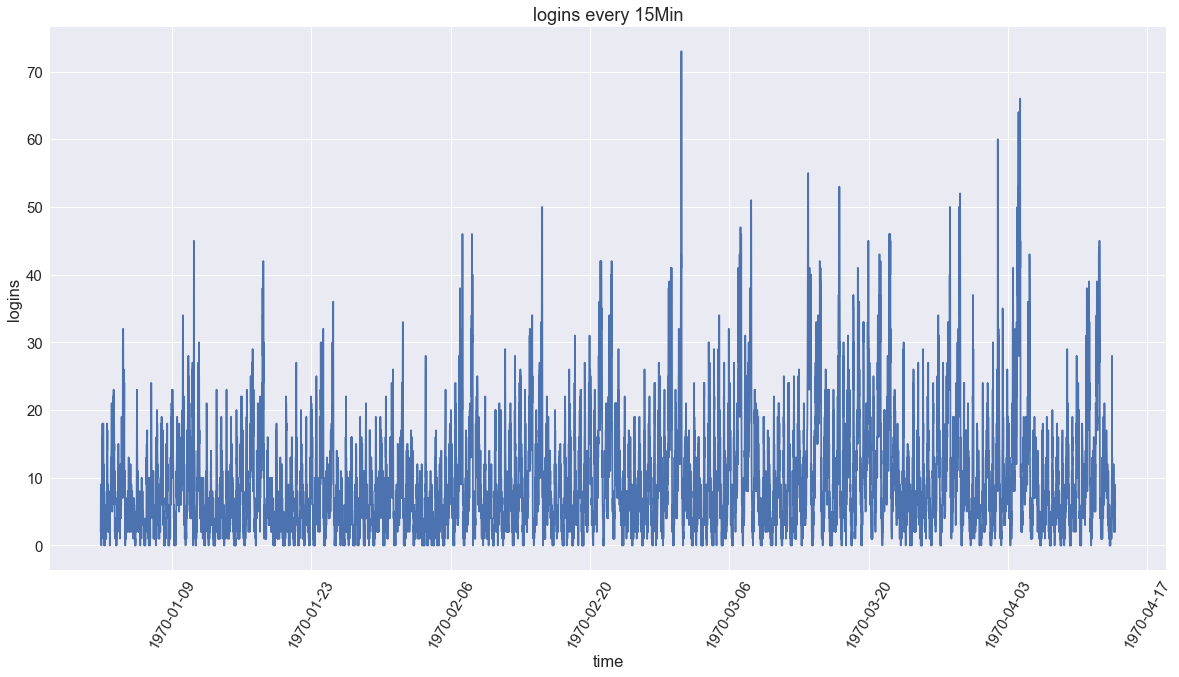

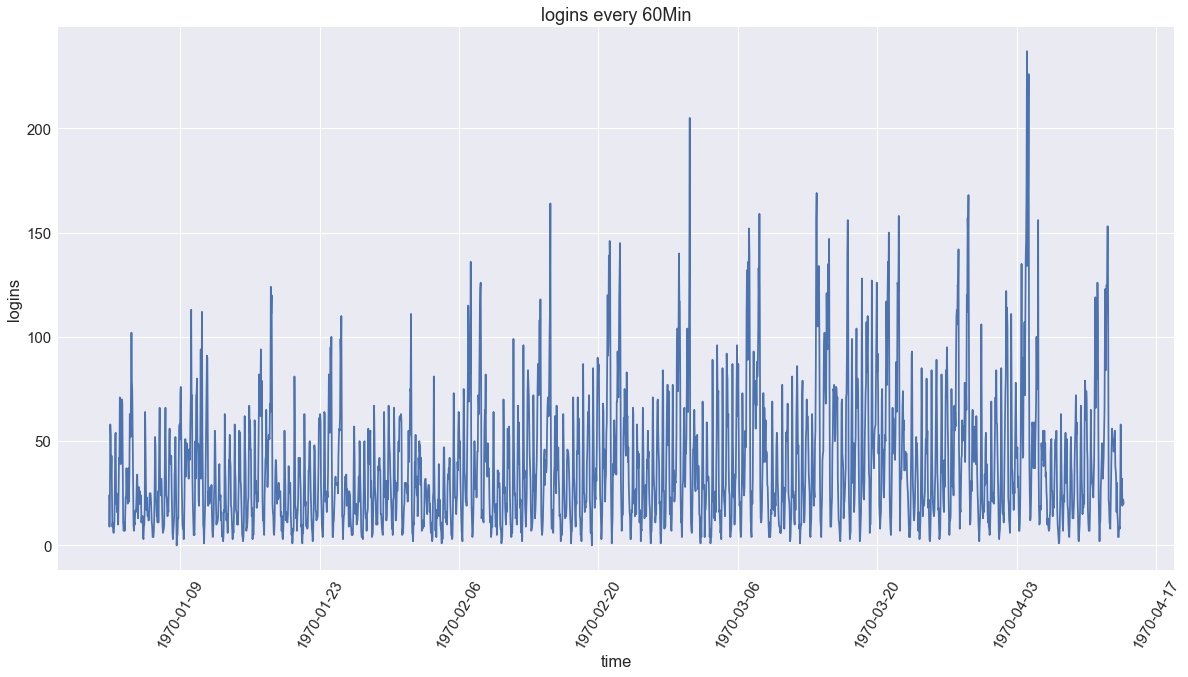

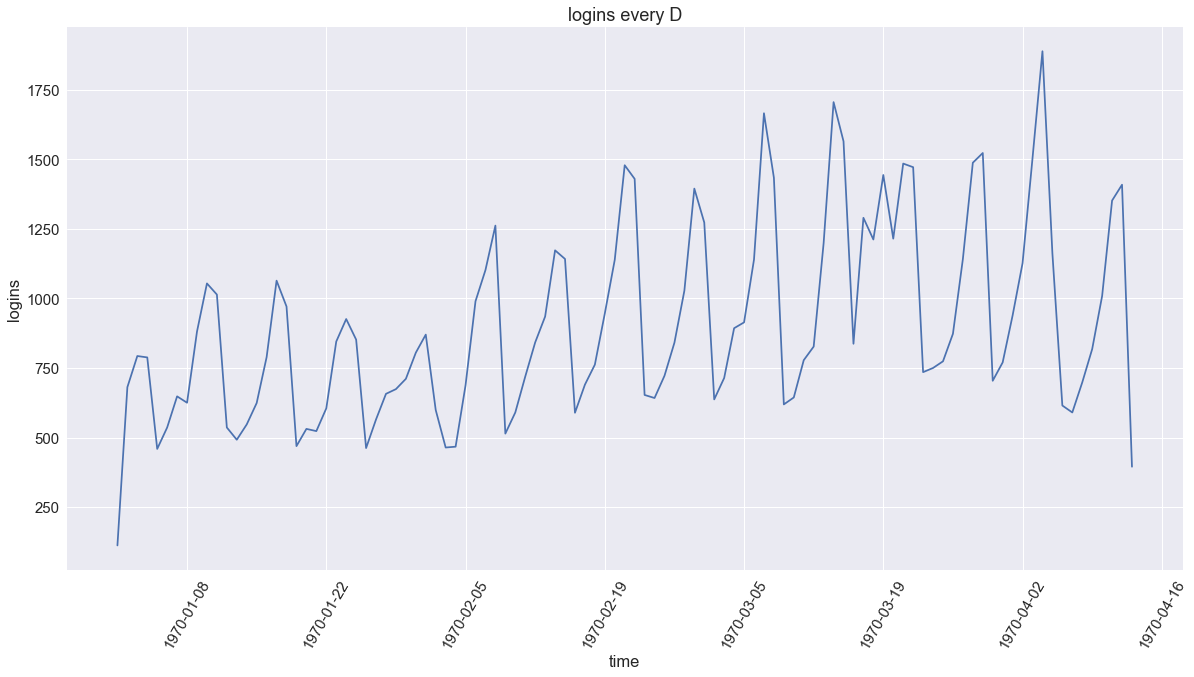

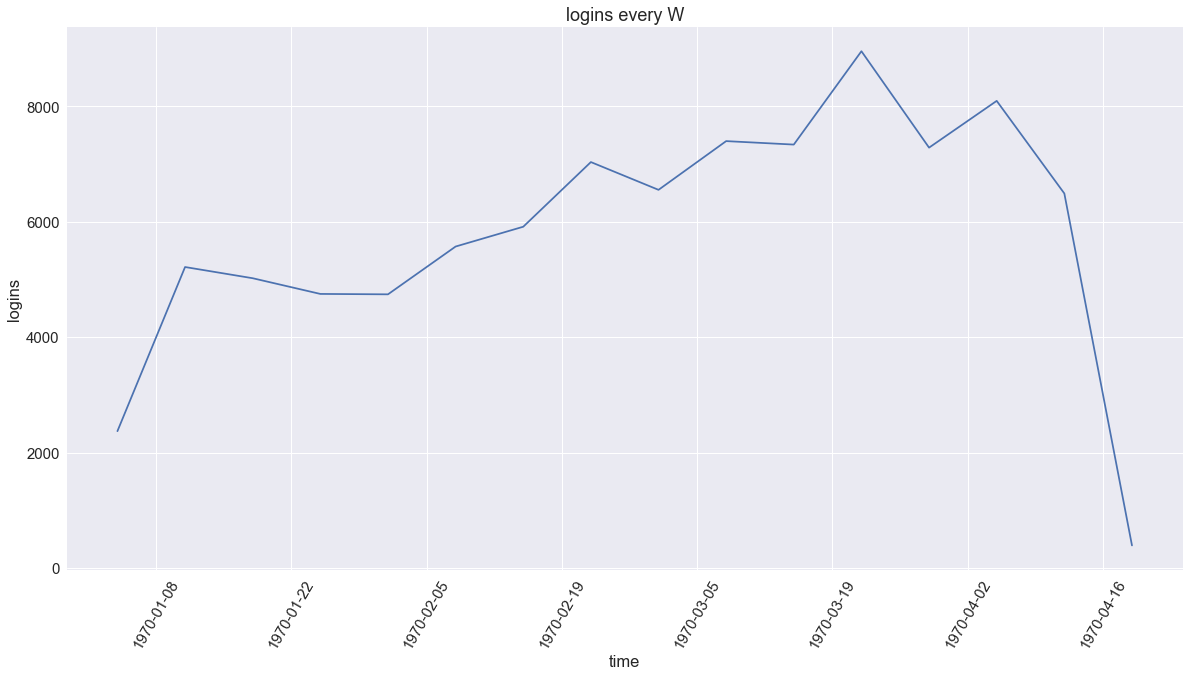

In [9]:
sns.set(font_scale=1.5)

def plot_sample(df, start='1970-01-01', end='1970-04-20', y_col='login', time_int='15Min', how='sum', figsize=(20,10)):
    plt.figure(figsize=(20,10))
    df_agg = df[start:end].resample(time_int, how=how)
    x = df_agg.index.values
    y = df_agg[y_col].values
    plt.plot(x,y)
    plt.ylabel("logins")
    plt.xlabel("time")
    plt.xticks(rotation=60)
    plt.title("{}s every {}".format(y_col, time_int))
    
time_ints = ['15Min', '60Min', 'D', 'W']
for time in time_ints:
    plot_sample(logins, time_int=time)
    

The login info shows a cyclical pattern with regular peaks and valleys. Let's zoom in to get a closer look.

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


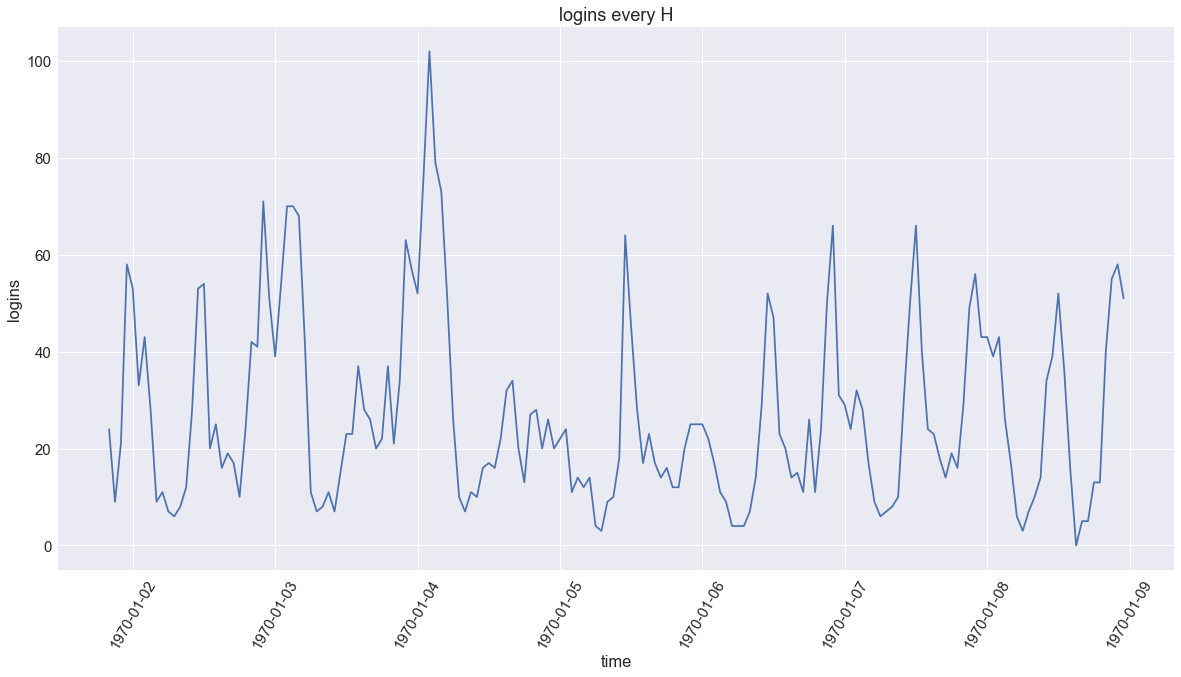

In [10]:
plot_sample(logins, start='1970-01-01', end='1970-01-08', time_int='H')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


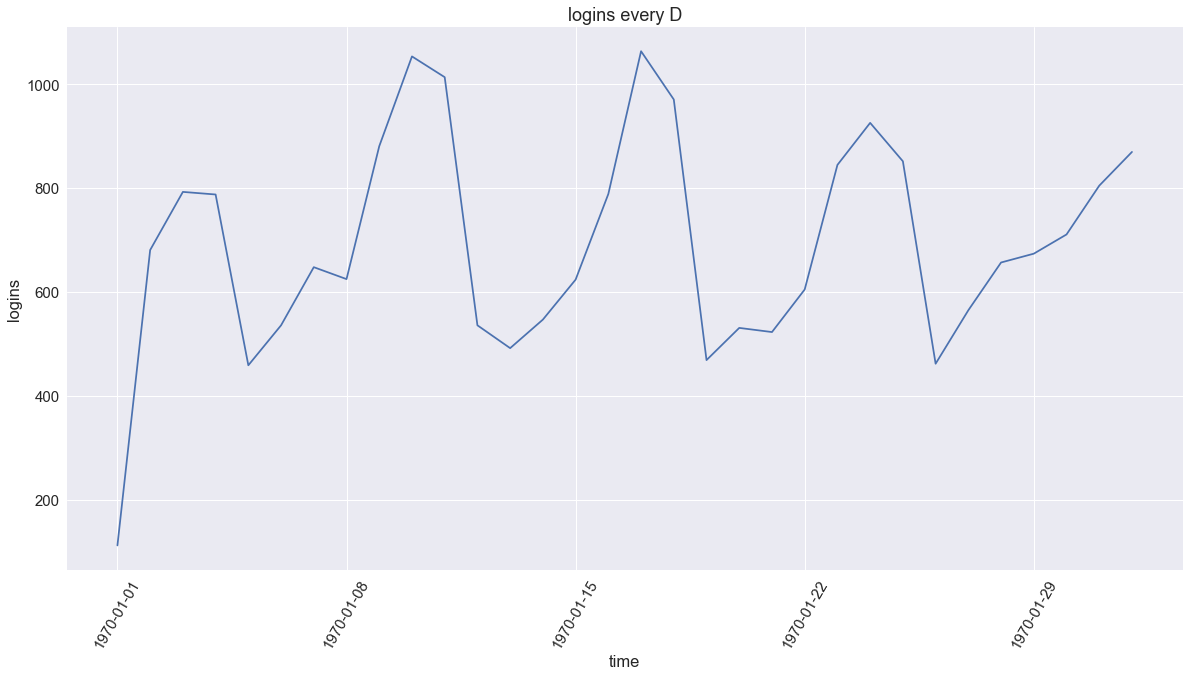

In [11]:
plot_sample(logins, start='1970-01-01', end='1970-02-01', time_int='D')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


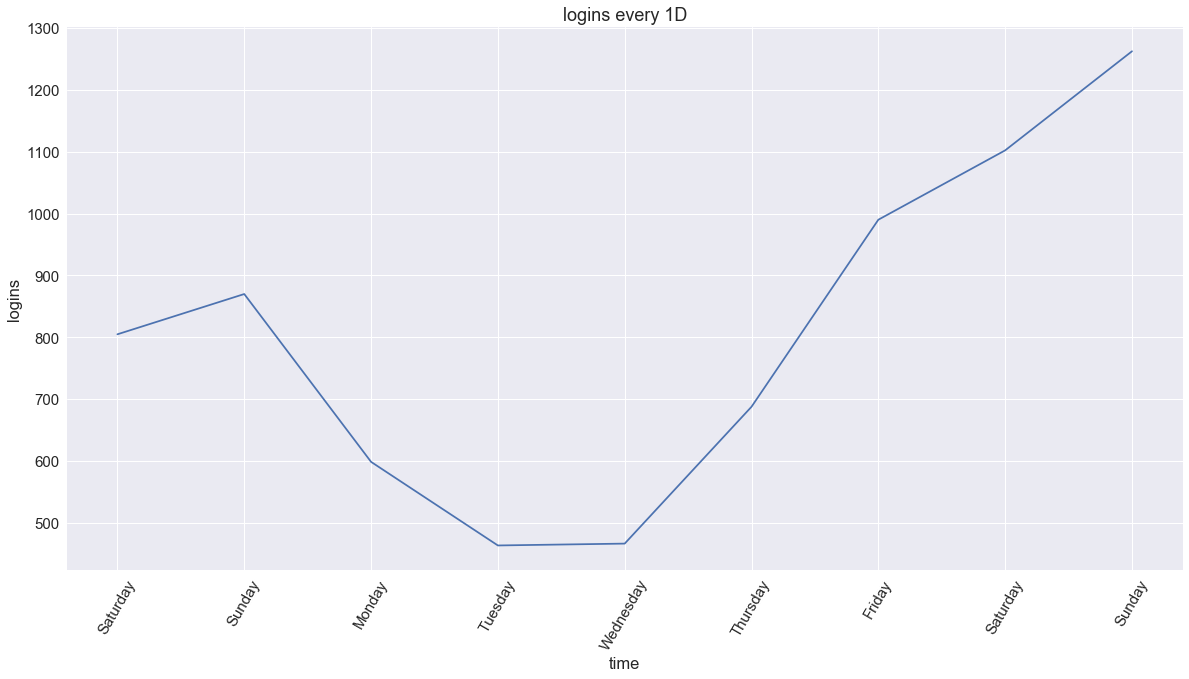

In [12]:
def plot_weekday(df, start='1970-01-01', end='1970-04-20', y_col='login', time_int='15Min', how='sum', figsize=(20,10)):
    fig, ax = plt.subplots(figsize=figsize)
    #plt.figure(figsize=(20,10))
    df_agg = df[start:end].resample(time_int, how=how)
    x = df_agg.index.values
    df_agg['weekday'] = [calendar.day_name[date.weekday()] for date in df_agg.index]
    #ax.set_xticks(range(0,len(df_agg),6))
    ax.set_xticklabels(df_agg['weekday'])
    y = df_agg[y_col].values
    plt.plot(x, y)
    plt.ylabel("logins")
    plt.xlabel("time")
    plt.xticks(rotation=60)
    plt.title("{}s every {}".format(y_col, time_int))

plot_weekday(logins, start='1970-01-31', end='1970-02-08', time_int='1D')



There's a spike in logins on weekends, and less logins in the middle of the week.

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


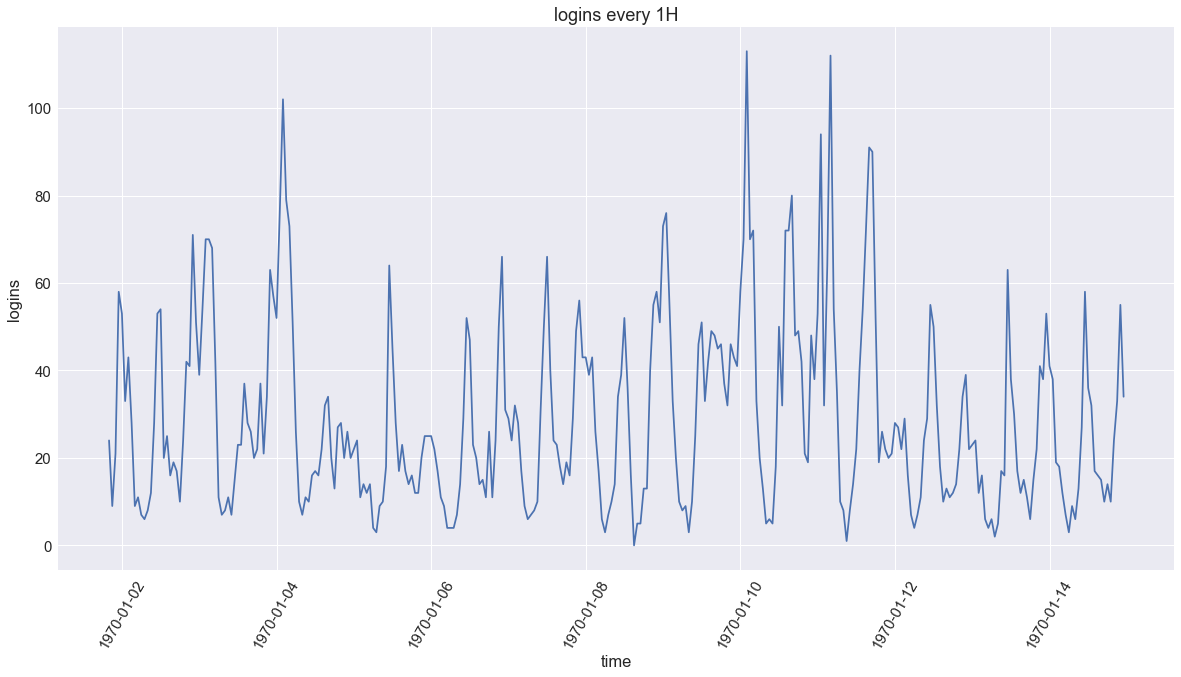

In [13]:
plot_sample(logins, start='1970-01-01 00:00:00', end='1970-01-15 00:00:00', time_int='1H')

On a given 24 hour cycle, there are more logins at late at night (10PM-2AM)

## Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

    a. how you will implement the experiment
    
    b. what statistical test(s) you will conduct to verify the significance of the
    observation
    
    c. how you would interpret the results and provide recommendations to the city
    operations team along with any caveats.


1. The metric I'd choose would be the percent difference between passengers from Gotham vs. passengers from Metropolis. A neutral (~0) percent difference would mean that a passenger serves both cities equally. The farther away from 0, the more exclusive to a specific city a driver is. This is a metric that is simple to interpret and directly measures the proportion of service between cities. I'll call this Service Proportion, or `sp`. 
2. This experiment would be an A/B test, where A and B would be the `sp` before and after reimbursing toll costs respectively. The null hypothesis is that reimbursing toll costs doesn't cause drivers to service the two cities more evenly. The alternate hypothesis is that the reimbursing toll costs causes drivers to service the two cities more evenly.
    a. To implement this experiment, I first gather relevant driver and trip data, such as the location of the trip, the 
    b. One statistical test I'll conduct is a p-value test. Another is a z-test.
    c. If `sp` improves by a significant amount, then reimbursing toll costs evens out the service between two cities. Inversely, if `sp` stays the same, then more creative solutions will have to be recommended, such as rewarding drivers for servicing both cities. Alternatively, if reimbursing toll costs improves `sp` but is less profitable, then maybe reimbursing toll costs under specific hours would drive down the costs.

## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).


### Data description
- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYYMMDD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

### 1) Cleaning, Exploratory Analysis

In [14]:
with open('ultimate_data_challenge.json') as json_data:
    ultimate_json = json.load(json_data)
    ultimate = pd.DataFrame(ultimate_json)

ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [15]:
ultimate.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [16]:
ultimate.last_trip_date = pd.to_datetime(ultimate.last_trip_date)
ultimate.signup_date = pd.to_datetime(ultimate.signup_date)

In [17]:
last_date = ultimate.last_trip_date.max()
cutoff = last_date - timedelta(days=31)
ultimate['retained'] = ultimate.last_trip_date.map(lambda x: 1 if x > cutoff else 0)
ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [18]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retained                  50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


There are missing values for the columns `avg_rating_by_driver` and `avg_rating_of_driver`. To decide how to impute this, let's look at the distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B5DFBFDD68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001B5DFBFC128>]], dtype=object)

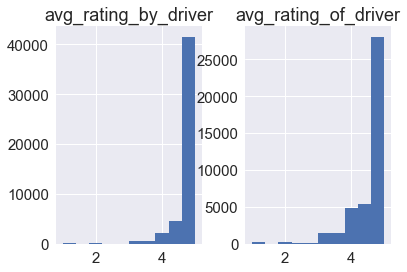

In [19]:
ultimate[['avg_rating_by_driver', 'avg_rating_of_driver']].hist()

In [20]:
ultimate[['avg_rating_by_driver', 'avg_rating_of_driver']].mean()

avg_rating_by_driver    4.778158
avg_rating_of_driver    4.601559
dtype: float64

In [21]:
ultimate[['avg_rating_by_driver', 'avg_rating_of_driver']].median()

avg_rating_by_driver    5.0
avg_rating_of_driver    4.9
dtype: float64

In [22]:
ultimate[['avg_rating_by_driver', 'avg_rating_of_driver']].std()

avg_rating_by_driver    0.446652
avg_rating_of_driver    0.617338
dtype: float64

The ratings are heavily skewed towards 5, with a mean around ~4.6 and ~4.78 for the rating given by the driver and for the driver respectively. With how skewed these ratings are, it's reasonable to guess that the missing values will likely fall into either the mean or median of the distribution. So, I'll fill missing values with the means of the respective columns.

In [23]:
ultimate.avg_rating_by_driver = ultimate.avg_rating_by_driver.fillna(round(ultimate.avg_rating_by_driver.mean(), 1))
ultimate.avg_rating_of_driver = ultimate.avg_rating_of_driver.fillna(round(ultimate.avg_rating_of_driver.mean(), 1))
ultimate.info()
                                                                     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retained                  50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


The next column with NA's to deal with is `phone`. Again I'll look at the distribution to decide how to impute missing data.

In [24]:
ultimate.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [25]:
iphones, androids = ultimate.phone.value_counts()
iphone_pct = 100*iphones / (iphones + androids)
android_pct = 100*androids / (iphones + androids)
print("iPhone percent: {}, Android percent: {}".format(iphone_pct, android_pct))

iPhone percent: 69.71615192323199, Android percent: 30.283848076768002


It appears that there are roughly 2 iphones for every 1 android. The number of androids are too significant to just assume all missing values are iphones. So, I'll fill the missing values with the same proportion of these phone values.

In [26]:
phone_sample = ultimate.loc[~ultimate.phone.isna(), 'phone'].values
n_missing = len(ultimate.loc[ultimate.phone.isna(), 'phone'].values)
missing_replacement = np.random.choice(phone_sample, size=n_missing)
ultimate.loc[ultimate.phone.isna(), 'phone'] = missing_replacement
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retained                  50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


In [27]:
iphones, androids = ultimate.phone.value_counts()
iphone_pct = 100*iphones / (iphones + androids)
android_pct = 100*androids / (iphones + androids)
print("iPhone percent: {}, Android percent: {}".format(iphone_pct, android_pct))

iPhone percent: 69.696, Android percent: 30.304


The resampling didn't move the overall percentage by much.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B5E14C8908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001B5E02FB4A8>]], dtype=object)

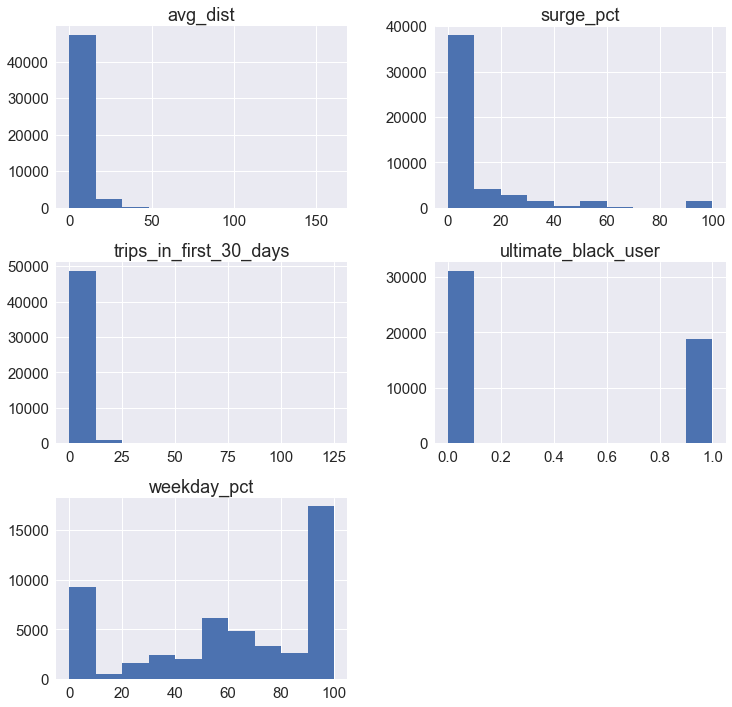

In [28]:
ultimate[['avg_dist', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'trips_in_first_30_days']].hist(figsize=(12,12))

### 2) Predicting retained users

#### Feature Engineering:
- normalize/scale the uneven columns
- encode the city and phone

In [29]:
not_retained, retained = ultimate.retained.value_counts()
not_retained_pct = 100*not_retained / (not_retained + retained)
retained_pct = 100*retained / (not_retained + retained)
print("not retained percent: {}%, retained percent: {}%".format(not_retained_pct, retained_pct))

not retained percent: 62.392%, retained percent: 37.608%


In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_auc_score, confusion_matrix
from pandas_ml import ConfusionMatrix
from itertools import chain



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B5E2FEAEB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001B5E305E668>]], dtype=object)

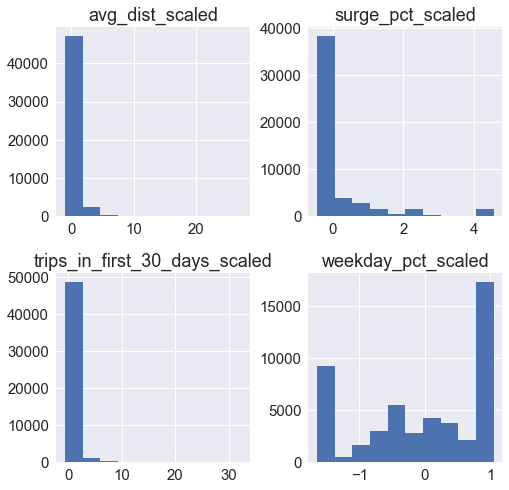

In [31]:
scaler = StandardScaler()
to_scale = ['avg_dist', 'surge_pct', 'weekday_pct', 'trips_in_first_30_days']
scaled_cols = ["{}_scaled".format(col) for col in to_scale]
#ultimate[scaled_cols] = scaler.fit_transform(ultimate[to_scale].values)
ultimate_scaled = pd.DataFrame(scaler.fit_transform(ultimate[to_scale].values), columns=scaled_cols)
ultimate_scaled.hist(figsize=(8,8))

In [32]:
ultimate = ultimate.join(ultimate_scaled, how='outer')

In [33]:
ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,avg_dist_scaled,surge_pct_scaled,weekday_pct_scaled,trips_in_first_30_days_scaled
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1,-0.372650,0.328202,-0.397131,0.453984
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0,0.431583,-0.443394,-0.294653,-0.600689
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0,-0.880771,-0.443394,1.053741,0.190316
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1,-0.602181,0.558679,0.514383,1.772325
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0,-0.467266,0.147829,0.579106,3.090665


In [34]:
ultimate.ultimate_black_user = ultimate.ultimate_black_user.astype(int)
to_encode = ['ultimate_black_user', 'phone', 'city']
df_dummy = pd.get_dummies(ultimate[to_encode])
dummy_cols = df_dummy.columns
ultimate = pd.concat([ultimate, df_dummy], axis=1)
ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,avg_dist_scaled,surge_pct_scaled,weekday_pct_scaled,trips_in_first_30_days_scaled,ultimate_black_user,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,-0.372650,0.328202,-0.397131,0.453984,1,0,1,0,1,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,0.431583,-0.443394,-0.294653,-0.600689,0,1,0,1,0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,-0.880771,-0.443394,1.053741,0.190316,0,0,1,1,0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,-0.602181,0.558679,0.514383,1.772325,1,0,1,0,1,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,-0.467266,0.147829,0.579106,3.090665,0,1,0,0,0,1


In [35]:
feature_cols = scaled_cols + list(dummy_cols)
feature_cols


['avg_dist_scaled',
 'surge_pct_scaled',
 'weekday_pct_scaled',
 'trips_in_first_30_days_scaled',
 'ultimate_black_user',
 'phone_Android',
 'phone_iPhone',
 'city_Astapor',
 "city_King's Landing",
 'city_Winterfell']

In [36]:
#ultimate['signup_day'] = pd.to_timedelta(ultimate.signup_date)
#ultimate.signup_date.groupby(pd.TimeGrouper("M"))

In [37]:
X = ultimate[feature_cols].values
y = ultimate['retained'].values
X_train, X_test, y_train, y_true = train_test_split(X, y, test_size=0.3, stratify=y)

recall: 0.5023931926963304
precision: 0.6737993342843557
accuracy: 0.7214
f1: 0.5756067837920178
Feature importances:  {'ultimate_black_user': 0.42260729610971731, 'phone_Android': 0.42260729610971731, 'avg_dist_scaled': -0.20952115857962589, 'city_Astapor': 0.27548494039722726, 'surge_pct_scaled': 0.042499150432958023, 'weekday_pct_scaled': -0.003814049871459791, 'city_Winterfell': 0.77760501065502485, 'phone_iPhone': -0.80804583316708289, "city_King's Landing": -0.91786933445808805, 'trips_in_first_30_days_scaled': 0.44051468527461934}


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

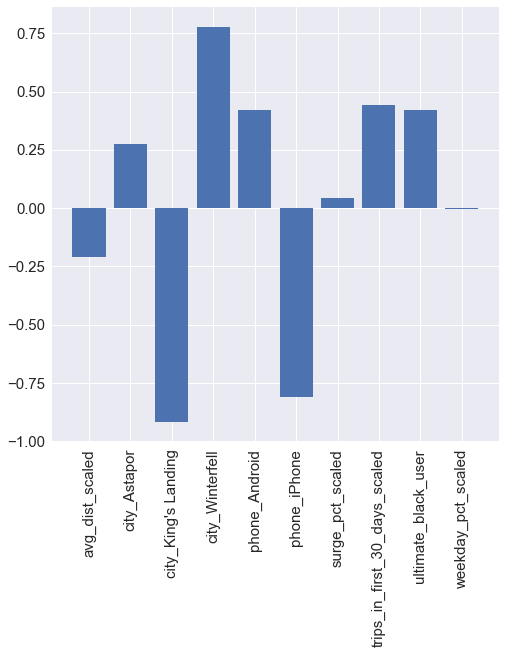

In [38]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_probs = lr.predict_proba(X_test)

# n = len(y_probs)
# probs = list(zip(*y_probs))
# probs_1 = [y for x in probs for y in x][n:]
# y_pred_weighted = [1 if (prob > retained_pct/100) else 0 for prob in y_probs]

metrics = [accuracy_score, precision_score, recall_score, f1_score]
metric_names = ['accuracy', 'precision', 'recall', 'f1', 'confusion_matrix']
metric_dict = dict(zip(metric_names, metrics))
for name, metric in metric_dict.items():
    print("{}: {}".format(name, metric(y_true, y_pred)))
    
coefs = list(*chain(lr.coef_))
feature_dict = dict(zip(feature_cols, coefs))

#sorted(feature_dict, key=feature_dict.get)
print("Feature importances: ", feature_dict)
plt.figure(figsize=(8,8))
plt.bar(feature_dict.keys(), feature_dict.values())
plt.xticks(rotation=90)

In [39]:
weight_1 = not_retained_pct/100
weight_0 = retained_pct/100
print(weight_1, weight_0)

0.62392 0.37607999999999997


recall: 0.6731076050345683
precision: 0.6007911392405063
accuracy: 0.7088666666666666
f1: 0.6348967477635649
Feature importances:  {'ultimate_black_user': 0.41619416296608602, 'phone_Android': 0.41619416296608602, 'avg_dist_scaled': -0.20971619979615597, 'city_Astapor': 0.41398075643536236, 'surge_pct_scaled': 0.036796283705281416, 'weekday_pct_scaled': -0.0084219474439261883, 'city_Winterfell': 0.87433362546627758, 'phone_iPhone': -0.66680111340812809, "city_King's Landing": -0.82304724298168863, 'trips_in_first_30_days_scaled': 0.45479470416042994}


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

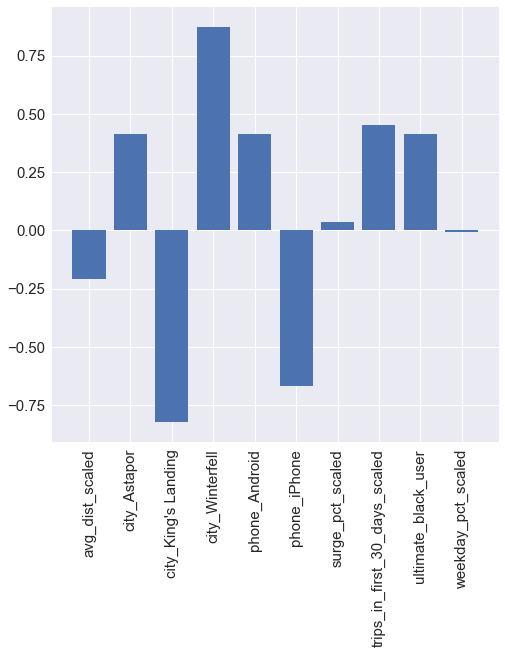

In [40]:
lr = LogisticRegression(class_weight={0:weight_0, 1:weight_1})
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_probs = lr.predict_proba(X_test)

# n = len(y_probs)
# probs = list(zip(*y_probs))
# probs_1 = [y for x in probs for y in x][n:]
# y_pred_weighted = [1 if (prob > retained_pct/100) else 0 for prob in y_probs]

metrics = [accuracy_score, precision_score, recall_score, f1_score]
metric_names = ['accuracy', 'precision', 'recall', 'f1', 'confusion_matrix']
metric_dict = dict(zip(metric_names, metrics))
for name, metric in metric_dict.items():
    print("{}: {}".format(name, metric(y_true, y_pred)))
    
coefs = list(*chain(lr.coef_))
feature_dict = dict(zip(feature_cols, coefs))

#sorted(feature_dict, key=feature_dict.get)
print("Feature importances: ", feature_dict)
plt.figure(figsize=(8,8))
plt.bar(feature_dict.keys(), feature_dict.values())
plt.xticks(rotation=90)

In [41]:
cm = ConfusionMatrix(y_pred, y_true)
cm.print_stats()

population: 15000
P: 6320
N: 8680
PositiveTest: 5641
NegativeTest: 9359
TP: 3797
TN: 6836
FP: 1844
FN: 2523
TPR: 0.600791139241
TNR: 0.787557603687
PPV: 0.673107605035
NPV: 0.730419916658
FPR: 0.212442396313
FDR: 0.326892394965
FNR: 0.399208860759
ACC: 0.708866666667
F1_score: 0.634896747764
MCC: 0.395865388466
informedness: 0.388348742927
markedness: 0.403527521692
prevalence: 0.421333333333
LRP: 2.82801902853
LRN: 0.506894808571
DOR: 5.57910434416
FOR: 0.269580083342


In [42]:
cm.classification_report

,precision,recall,F1_score,support
Classes,,,,
False,0.73042,0.787558,0.757913,8680
True,0.673108,0.600791,0.634897,6320
__avg / total__,0.706272,0.708867,0.706082,15000


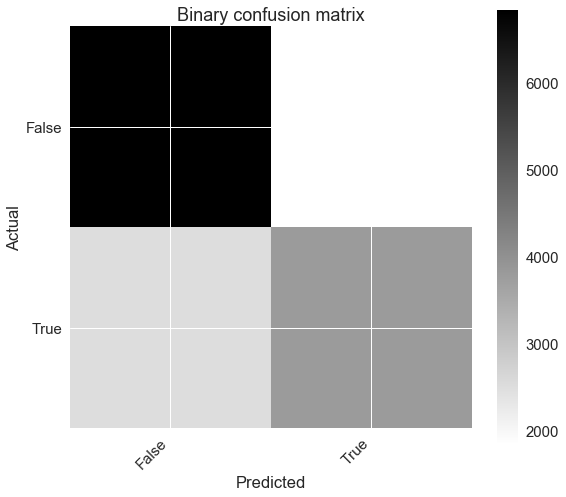

In [43]:
cm.plot()

### 3) Conclusions from Logistic Regression
According to our model, using an iPhone or being in the city of King's Landing negatively affected the chance of being retained. I would recommend focusing efforts on improving service in King's Landing as well as see if there's something wrong with the iPhone app.

recall: 0.5915617798262719
precision: 0.6116202346041055
accuracy: 0.7051333333333333
f1: 0.6014238082364604
Feature importances:  {'ultimate_black_user': 0.023334449712480231, 'phone_Android': 0.0067315043151756123, 'avg_dist_scaled': 0.4269151613779924, 'city_Astapor': 0.029170463142736719, 'surge_pct_scaled': 0.18167847281642974, 'weekday_pct_scaled': 0.16155886223522942, 'city_Winterfell': 0.054091198309990193, 'phone_iPhone': 0.004910043061968879, "city_King's Landing": 0.012192995500799799, 'trips_in_first_30_days_scaled': 0.087874404610673279}


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

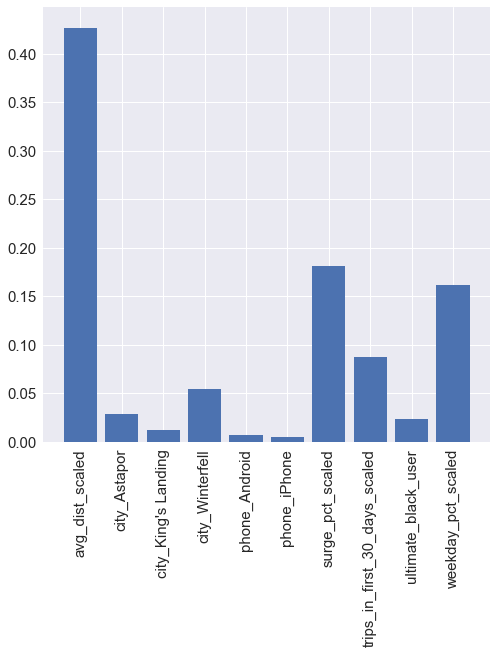

In [44]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
y_probs = dtc.predict_proba(X_test)

metrics = [accuracy_score, precision_score, recall_score, f1_score]
metric_names = ['accuracy', 'precision', 'recall', 'f1', 'confusion_matrix']
metric_dict = dict(zip(metric_names, metrics))
for name, metric in metric_dict.items():
    print("{}: {}".format(name, metric(y_true, y_pred)))
    
feature_dict = dict(zip(feature_cols, dtc.feature_importances_))
print("Feature importances: ", feature_dict)
plt.figure(figsize=(8,8))
plt.bar(feature_dict.keys(), feature_dict.values())
plt.xticks(rotation=90)

In [ ]:
dtc = DecisionTreeClassifier(class_weight={0:weight_0, 1:weight_1})
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
y_probs = dtc.predict_proba(X_test)

metrics = [accuracy_score, precision_score, recall_score, f1_score]
metric_names = ['accuracy', 'precision', 'recall', 'f1', 'confusion_matrix']
metric_dict = dict(zip(metric_names, metrics))
for name, metric in metric_dict.items():
    print("{}: {}".format(name, metric(y_true, y_pred)))
    
feature_dict = dict(zip(feature_cols, dtc.feature_importances_))
print("Feature importances: ", feature_dict)
plt.figure(figsize=(8,8))
plt.bar(feature_dict.keys(), feature_dict.values())
plt.xticks(rotation=90)

In [ ]:
cm = ConfusionMatrix(y_pred, y_true)
cm.print_stats()

In [ ]:
cm.classification_report

In [ ]:
cm.plot()

In [ ]:
from sklearn.svm import LinearSVC
#lr = LinearSVC(class_weight={0:weight_0, 1:weight_1})
lr = LinearSVC()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
#y_probs = lr.predict_proba(X_test)

metrics = [accuracy_score, precision_score, recall_score, f1_score]
metric_names = ['accuracy', 'precision', 'recall', 'f1', 'confusion_matrix']
metric_dict = dict(zip(metric_names, metrics))
for name, metric in metric_dict.items():
    print("{}: {}".format(name, metric(y_true, y_pred)))
    
coefs = list(*chain(lr.coef_))
feature_dict = dict(zip(feature_cols, coefs))

#sorted(feature_dict, key=feature_dict.get)
print("Feature importances: ", feature_dict)
plt.figure(figsize=(8,8))
plt.bar(feature_dict.keys(), feature_dict.values())
plt.xticks(rotation=90)

In [ ]:
cm = ConfusionMatrix(y_pred, y_true)
cm.print_stats()

In [ ]:
cm.classification_report

The Linear SVC results confirm the LR results.